# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

## Deliverable 1: Get a Summary DataFrame 

In [3]:
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [4]:
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [5]:
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

In [6]:
avg_fare_per_ride = total_fare/total_rides

In [7]:
avg_fare_per_driver = total_fare/total_drivers

In [8]:
pyber_summary_df = pd.DataFrame({
                        "Total Rides":total_rides,
                        "Total Drivers":total_drivers,
                        "Total Fares":total_fare,
                        "Average Fare per Ride":avg_fare_per_ride,
                        "Average Fare per Driver":avg_fare_per_driver})

In [9]:
pyber_summary_df.index.name = None

In [10]:
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
sum_of_fares_by_date_df= pyber_data_df.groupby(["date","type"]).sum()["fare"]

In [13]:
sum_of_fares_by_date_df = sum_of_fares_by_date_df.reset_index()

In [14]:
sum_of_fares_by_date_df_pivot = sum_of_fares_by_date_df.pivot(index ="date", columns="type", values = "fare")

In [15]:
given_date_df = (sum_of_fares_by_date_df_pivot.loc['2019-01-01':'2019-04-29'])

In [16]:
given_date_df.index = pd.to_datetime(given_date_df.index)

In [17]:
given_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
given_date_week_df = given_date_df.resample("w").sum()

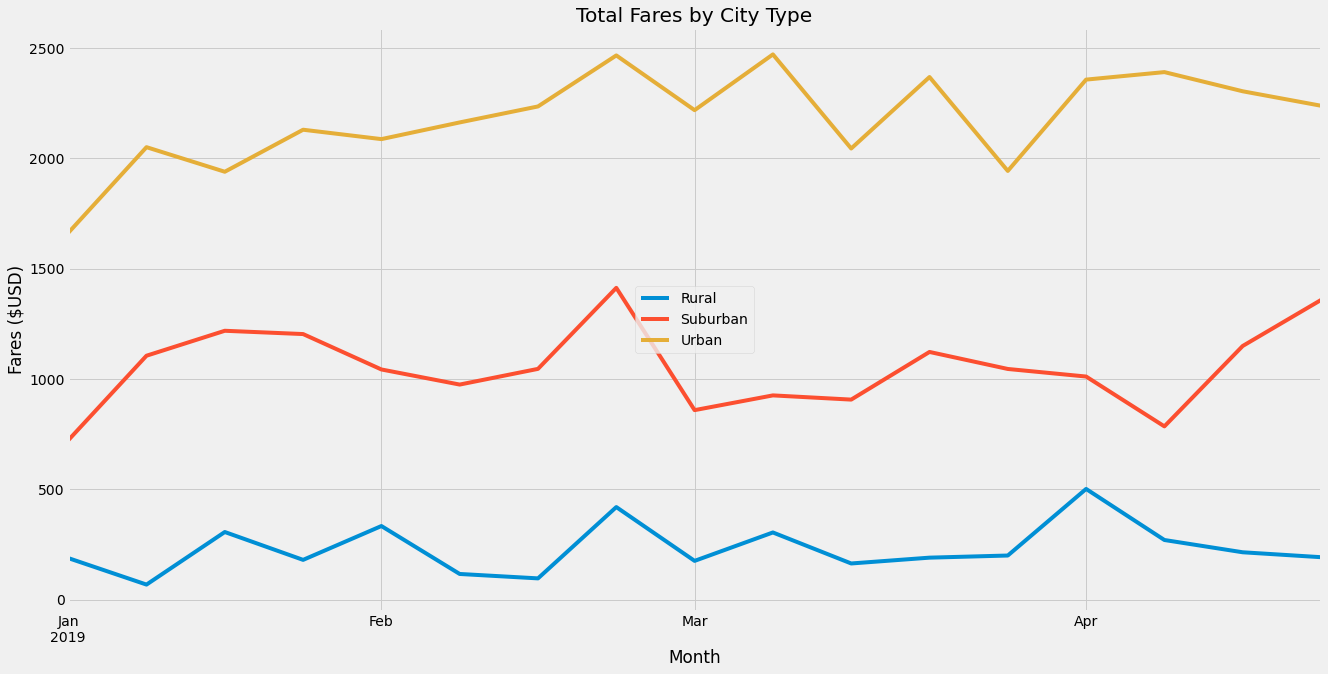

In [19]:
from matplotlib import style

style.use('fivethirtyeight')

plt.rc('figure', figsize=(20,10))

given_date_week_df.plot()


plt.title("Total Fares by City Type")
plt.ylabel("Fares ($USD)")
plt.xlabel("Month")
plt.legend(loc = 'center')

plt.savefig("Analysis/total_fares_by_city.png")

